# Lista 4

### Imports

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as skmt
from sklearn import linear_model, svm, ensemble

In [69]:
import stats as sts
import linear_model as lm
import metrics as mts
import resample as rs
import transform as tf

### Read Wines

In [70]:
wines = np.genfromtxt('../datasets/winequality-red.csv', delimiter=';', skip_header=1)

In [71]:
wines

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [72]:
X = wines[:,:11]
y = wines[:,11]

In [73]:
print(y, y.shape, X.shape)

[5. 5. 5. ... 6. 5. 6.] (1599,) (1599, 11)


### Create Folds

In [74]:
idx_train, idx_test = rs.split_k_fold(X.shape[0], 5, True,0)
evaluations = []

In [75]:
def show_mse(model):
    mse = []
    for i in range (5):
        Xtrain = X[idx_train[i]]
        Xtrain = tf.standardize(Xtrain)
        Ytrain = y[idx_train[i]]
        Xtest = X[idx_test[i]]
        Xtest = tf.standardize(Xtest)
        Ytest = y[idx_test[i]]
        model.fit(Xtrain, Ytrain)
        y_pred = model.predict(Xtest)
        mse.append(mts.mse(Ytest, y_pred))
    return mse

### SGD Regressor

In [76]:
sgd_model = linear_model.SGDRegressor()
sgd_mse = np.sum(show_mse(sgd_model))/5
evaluations.append(sgd_mse)
sgd_mse

/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.4296975237140144

### Linear Regression

In [77]:
lr_model = linear_model.LinearRegression()
lr_mse = np.sum(show_mse(lr_model)) / 5
evaluations.append(lr_mse)
lr_mse

0.42828614334125437

### Linear SVR

In [78]:
lsvr_model = svm.LinearSVR()
lsvr_mse = np.sum(show_mse(lsvr_model)) / 5
evaluations.append(lsvr_mse)
lsvr_mse

0.43580300630362895

### Epsilon - Support Vector Regression 

In [79]:
svr_model = svm.SVR()
svr_mse = np.sum(show_mse(svr_model)) / 5
evaluations.append(svr_mse)
svr_mse

0.3986474803921232

### Random Forest Regressor

In [80]:
rf_model = ensemble.RandomForestRegressor()
rf_model = np.sum(show_mse(rf_model)) / 5
evaluations.append(rf_model)
rf_model

0.4088707680250783

### Gradient Boosting Regressor

In [81]:
gbr_model = ensemble.RandomForestRegressor()
gbr_model = np.sum(show_mse(gbr_model)) / 5
evaluations.append(gbr_model)
gbr_model

0.40093401253918487

### Compare

In [82]:
evaluations

[0.4296975237140144,
 0.42828614334125437,
 0.43580300630362895,
 0.3986474803921232,
 0.4088707680250783,
 0.40093401253918487]

In [83]:
evaluations = np.array(evaluations[:])
class_names = np.array(['SGD','LR','LSVR','ESVR','RFR','GBR'])

([<matplotlib.axis.XTick at 0x7f9012d055f8>,
 <a list of 6 Text xticklabel objects>)

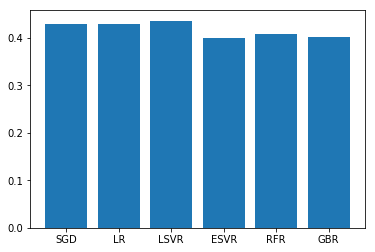

In [84]:
plt.bar(range(evaluations.shape[0]), evaluations)
plt.xticks(range(evaluations.shape[0]), class_names)

### Predict With The Best Model

In [85]:
svr_model.fit(X,y)
y_pred = svr_model.predict(X)

In [92]:
mts.mse(y, y_pred)

0.2363049717456656

### Stochastic Gradient Descent e Gradient Descent 

_A diferença é que o gradiente descendente usa toda o dado de treino para atualizar os parametros  e o estocastico usa apenas uma amostra dos dados._